In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [43]:
precipStations =  pd.read_csv("C:\\Projects\\62802175 Mengalum\\Data\\Rainfall\\KK\\Filled\\Selaud_RF.csv",index_col=0, parse_dates=['Time'], dayfirst=True)

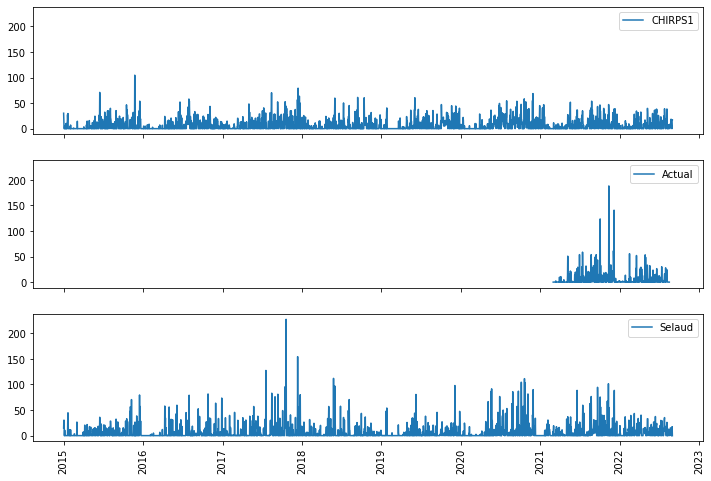

In [44]:
fig, axs=plt.subplots(3,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(precipStations.index,precipStations['CHIRPS1'],label='CHIRPS1')
axs[0].legend()
axs[1].plot(precipStations.index,precipStations['Actual'],label='Actual')
axs[1].legend()
axs[2].plot(precipStations.index,precipStations['Selaud'],label='Selaud')
axs[2].legend()
plt.xticks(rotation='vertical')
plt.show()

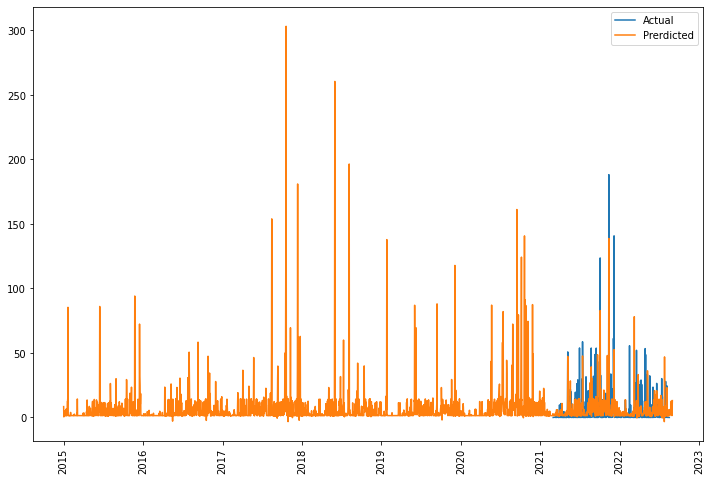

In [69]:
precipNotNan = precipStations.dropna()
xTrain = precipNotNan[['CHIRPS1','Selaud']]
xTrain_CHIRPS = precipNotNan[['CHIRPS1']]
xTrain_Selaud = precipNotNan[['Selaud']]
yTrain = precipNotNan[['Actual']].values.flatten()

scaler = StandardScaler().fit(xTrain.values)
xTrainScaled = scaler.transform(xTrain.values)

scaler_CHIRPS = StandardScaler().fit(xTrain_CHIRPS.values)
xTrainScaled_CHIRPS = scaler_CHIRPS.transform(xTrain_CHIRPS.values)

scaler_Selaud = StandardScaler().fit(xTrain_Selaud.values)
xTrainScaled_Selaud = scaler_Selaud.transform(xTrain_Selaud.values)

#regressor
regr = MLPRegressor(hidden_layer_sizes=(25,25,25), activation='relu', solver = 'adam' ,random_state=1, max_iter=5000).fit(xTrainScaled, yTrain)

#test
xTest = precipStations[['CHIRPS1','Selaud']].dropna()
xTestScaled = scaler.transform(xTest.values)
yPredict = regr.predict(xTestScaled)
fig, ax=plt.subplots(figsize=(12,8),sharex=True,sharey=True)
ax.plot(precipStations.index,precipStations['Actual'],label='Actual')
ax.plot(xTest.index,yPredict,label='Prerdicted')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

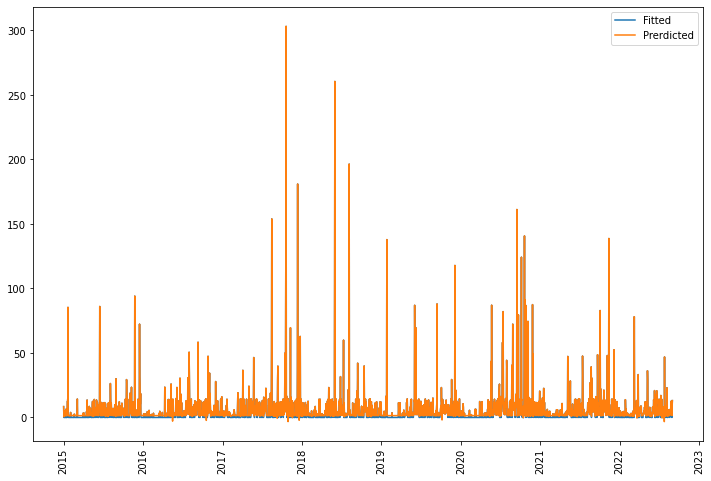

In [87]:
#Adjust results for bias and negatives, then append to dataframe.
precipStations['Predicted']=yPredict
for index, row in precipStations.iterrows():
    if row['Predicted'] <= 1.45:
        precipStations.loc[index,['Predicted']] = 0  
    else:
        precipStations.loc[index,['Predicted']] = precipStations.loc[index,['Predicted']]

fig, ax=plt.subplots(figsize=(12,8),sharex=True,sharey=True)
ax.plot(precipStations.index,precipStations['Predicted'],label='Fitted')
ax.plot(xTest.index,yPredict,label='Prerdicted')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

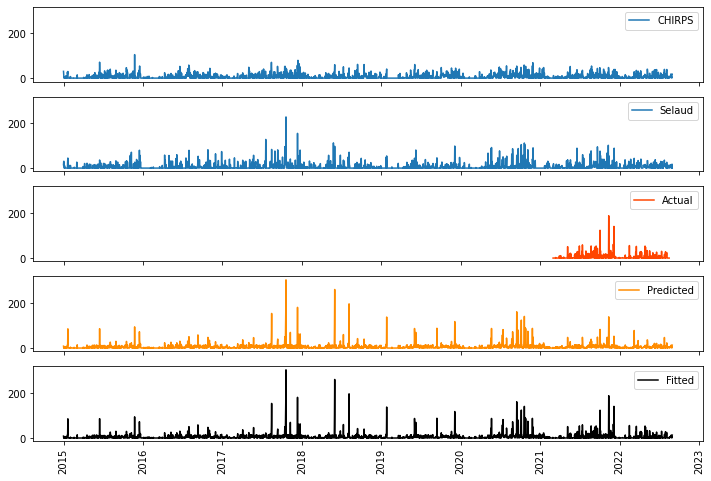

In [88]:
#Adjust results for bias and negatives, then append to dataframe.
precipStations['Predicted']=yPredict
for index, row in precipStations.iterrows():
    if row['Predicted'] <= 1.45:
        precipStations.loc[index,['Predicted']] = 0  
    else:
        precipStations.loc[index,['Predicted']] = precipStations.loc[index,['Predicted']]


precipStations['Fitted'] = 0
#fill the new column with original and predicted values for Actuals
for index, row in precipStations.iterrows():
    if np.isnan(row['Actual']) and ~np.isnan(row['CHIRPS1']) and ~np.isnan(row['Selaud']):
        precipStations.loc[index,['Fitted']] = row['Predicted']
    elif ~np.isnan(row['Actual']):
        precipStations.loc[index,['Fitted']] = row['Actual']
    else:
        row['Fitted'] = np.nan

#show original and filled values
fig, axs=plt.subplots(5,1,figsize=(12,8),sharex=True,sharey=True)
axs[0].plot(precipStations.index,precipStations['CHIRPS1'],label='CHIRPS')
axs[0].legend()
axs[1].plot(precipStations.index,precipStations['Selaud'],label='Selaud')
axs[1].legend()
axs[2].plot(precipStations.index,precipStations['Actual'],label='Actual',color='orangered')
axs[2].legend()
axs[3].plot(precipStations.index,precipStations['Predicted'],label='Predicted',color='darkorange')
axs[3].legend()
axs[4].plot(precipStations.index,precipStations['Fitted'],label='Fitted',color='black')
axs[4].legend()

plt.xticks(rotation='vertical')
plt.show()

In [89]:
precipStations.to_csv("C:\\Projects\\62802175 Mengalum\\Data\\Rainfall\\KK\\Filled\\Mengalum_Predicted.csv")